# 1. Imports

In [159]:
#Import all packages that will be used during this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data

In [160]:
#Load the file generated from data wrangling and cleaning.
file = 'Asteroid_Clean.csv'
df = pd.read_csv(file, sep=',', index_col=0)

In [161]:
#Verify that the data loaded correctly.
df.head().T

,0,1,2,3,4
semi-major_axis(au),2.76917,2.77247,2.66915,2.36142,2.57425
eccentricity,0.076009,0.230337,0.256942,0.0887215,0.191095
x-y_inclination(deg),10.5941,34.8362,12.9889,7.14177,5.36699
longitude_asc_node,80.3055,173.08,169.853,103.811,141.577
argument_perihelion,73.5977,310.049,248.139,150.729,358.688
perihelion_dist(au),2.55868,2.13386,1.98333,2.15191,2.08232
aphelion_dist(au),2.97965,3.41107,3.35497,2.57093,3.06617
orbital_period,4.6082,4.61644,4.36081,3.62884,4.13032
data_arc(d),8822,72318,72684,24288,63507
condition_code,0,0,0,0,0


# 3. Exploring the Data

### 3.1 Exploring Asteroid Classifications

#### 3.1.1 Which variables are categorical?

In [162]:
data_type = df.dtypes
data_type[(data_type == 'object')|(data_type == 'category')].index.tolist()

['near_earth_obj', 'physically_hazardous_asteroid', 'class']

#### 3.1.2 What determines how an asteroid is classified?

A common unit in astronomy is the astronomical unit (au), and is roughly equal to the distance from the Earth to the Sun or 150 million kilometers.

Near Earth Object (NEO) : An asteroid or comet that is less than 1.3 au from the sun.

Physically Hazardous: Determined by whether it is an NEO and its size.

Class: This is the orbit class, such as if it is part of the main asteroid belt, orbits a larger planet, or is near earth.


Resources: 

NEO Basics, Jet Propulsion Lab, https://cneos.jpl.nasa.gov/about/neo_groups.html

Asteroids, NASA Science - Solar System Explorations, https://solarsystem.nasa.gov/asteroids-comets-and-meteors/asteroids/in-depth/

#### 3.1.3 The relationship between the classifiers and the target.

Since the physically hazardous classifer is based on the target, it cannot be used for modeling.

The NEO classifer is represented within the more specific classifer of orbit class, so the NEO classifer is not needed for further exploration.

In [163]:
drop_list = ['near_earth_obj', 'physically_hazardous_asteroid']
df.drop(drop_list, axis=1, inplace=True)

#### 3.1.4 Oribit Class

Let's see how diamteter is distributed by orbit class.

In [164]:
#While experimenting with different plots, there were issues with 'class' having the type 'object'.
#Changed the type to category to avoid this.
df['class'] = df['class'].astype('category')
df['class'].dtypes

CategoricalDtype(categories=['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IMB', 'MBA', 'MCA',
                  'OMB', 'TJN', 'TNO'],
                 ordered=False)

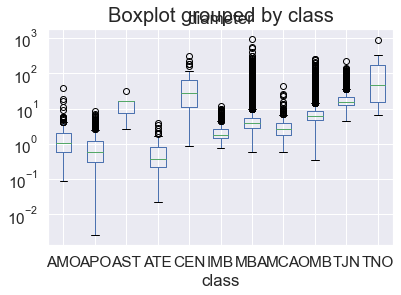

In [165]:
df.boxplot(by='class',column='diameter');

#The log scale is added because initially could only see the upper quadrant. 
plt.yscale('log')

In [166]:
#Diamter is measured in kilometers
#Potential sampling bias, since certain types of asteroids are easier to detect.
#Curious in the overall compared to groupings.
df['diameter'].describe()

count    137636.000000
mean          5.483228
std           9.385735
min           0.002500
25%           2.770000
50%           3.956000
75%           5.742000
max         939.400000
Name: diameter, dtype: float64

In [167]:
class_group = df.groupby('class').agg({'diameter':['mean','median','min','max','std','var','count']})
print(class_group)

         diameter                                                            
             mean   median     min      max         std           var   count
class                                                                        
AMO      1.766591   1.0450  0.0880   37.675    2.971932      8.832382     269
APO      0.958425   0.6025  0.0025    8.480    1.097541      1.204597     486
AST     14.283429  16.4000  2.6560   32.492   10.028549    100.571796       7
ATE      0.630716   0.3700  0.0230    3.879    0.702853      0.494002      95
CEN     52.473245  28.0000  0.8900  302.000   63.978581   4093.258785      49
IMB      2.288675   1.7460  0.7420   11.506    1.470614      2.162706     588
MBA      5.076341   3.8340  0.6000  939.400    8.277078     68.510018  126390
MCA      3.411217   2.5570  0.5870   42.870    3.512911     12.340547     355
OMB      8.783017   6.3565  0.3470  254.000   12.023403    144.562224    7510
TJN     20.771467  15.4710  4.5620  225.000   16.487683    271.8

Things to come back to: <br>
1) Some classes have smaller ranges. <br>
    a) Because of ability to observe? <br>
    b) Scientifically there is a reason only asteroids of a certain size range are in that orbit? <br>
2) The majoirity of the obseravtions are from the main asteroid belt, what impact does this have? <br>
3) Even with high variance, can a class with signifcantly higher mean/median be reliable to use? <br>
4) The overall asteroid diameter mean is driven by the main asteroid belt.

#### 3.1.5 Condition Code

A feature that should be under categories is condition_code. It is a rank from 0-9 of uncertainty in an objects orbit.

In [168]:
print(df['condition_code'].dtypes)
print(df['condition_code'].unique())

int64
[0 1 3 2 4 5 9 7 6 8]


In [169]:
df['condition_code'] = df['condition_code'].astype('category')

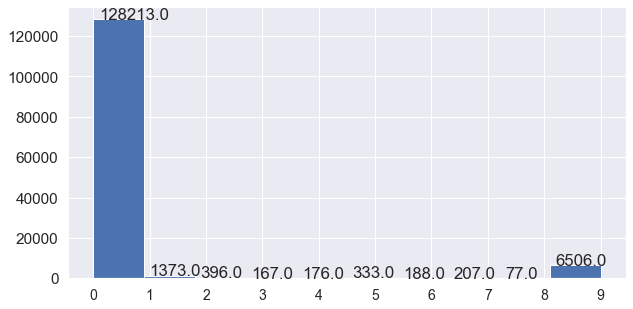

In [170]:
plt.figure(figsize=(10,5))

counts, bins, _ = plt.hist(df['condition_code'])

for n, b in zip(counts, bins):
    if n > 0:
        plt.gca().text(b + 0.1, n, str(n))
        
plt.xticks(np.arange(10),['0','1','2','3','4','5','6','7','8','9'] , size='small')
        
plt.show()

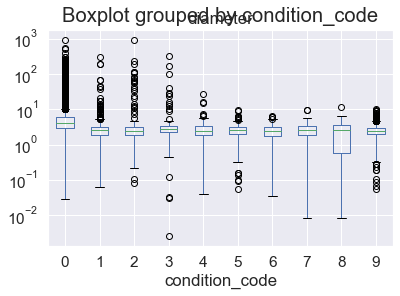

In [171]:
df.boxplot(by='condition_code',column='diameter');

#The log scale is added because initially could only see the upper quadrant. 
plt.yscale('log')

### 3.2 Exploring Asteroid Numerical Features

#### 3.2.1 Initial Look With Correlation

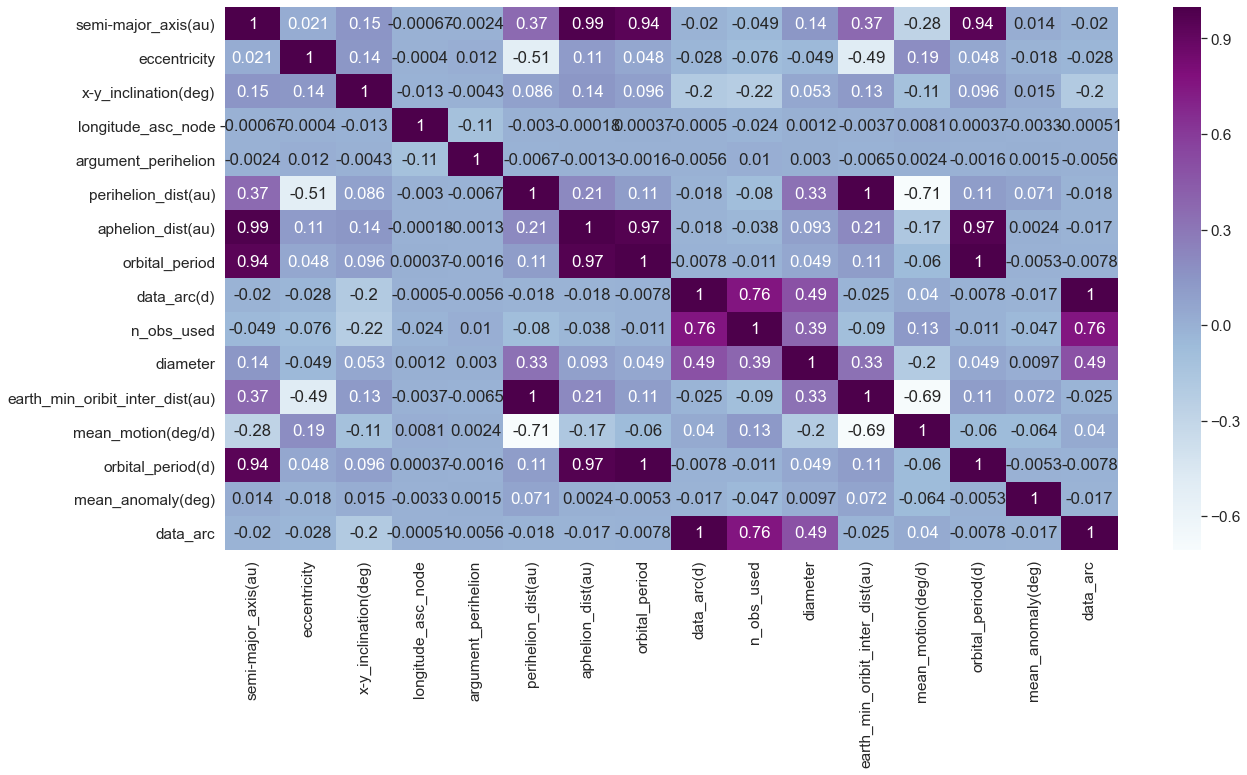

In [172]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='BuPu');

There are a few varibles that seem to be the same, so only one needs to be kept.

In [173]:
#data_arc(d) and data_arc
df.drop('data_arc', axis=1, inplace=True)

In [174]:
#orbital_period(d) and orbital_period
df.drop('orbital_period', axis=1, inplace=True)

In [175]:
#perihelion_distance and earth_min_orbit_inter_dist(au)
df.drop('earth_min_oribit_inter_dist(au)', axis=1, inplace=True)

What about all the strong correlations to semi-major axis? <br>
<br>
The semi-major axis is half the sum of the perihelion distance and the aphelion distance. It is also an aspect of orbit shape and size, which is why it would relate to orbital_period. All these variables will be kept for now until they are further explored.

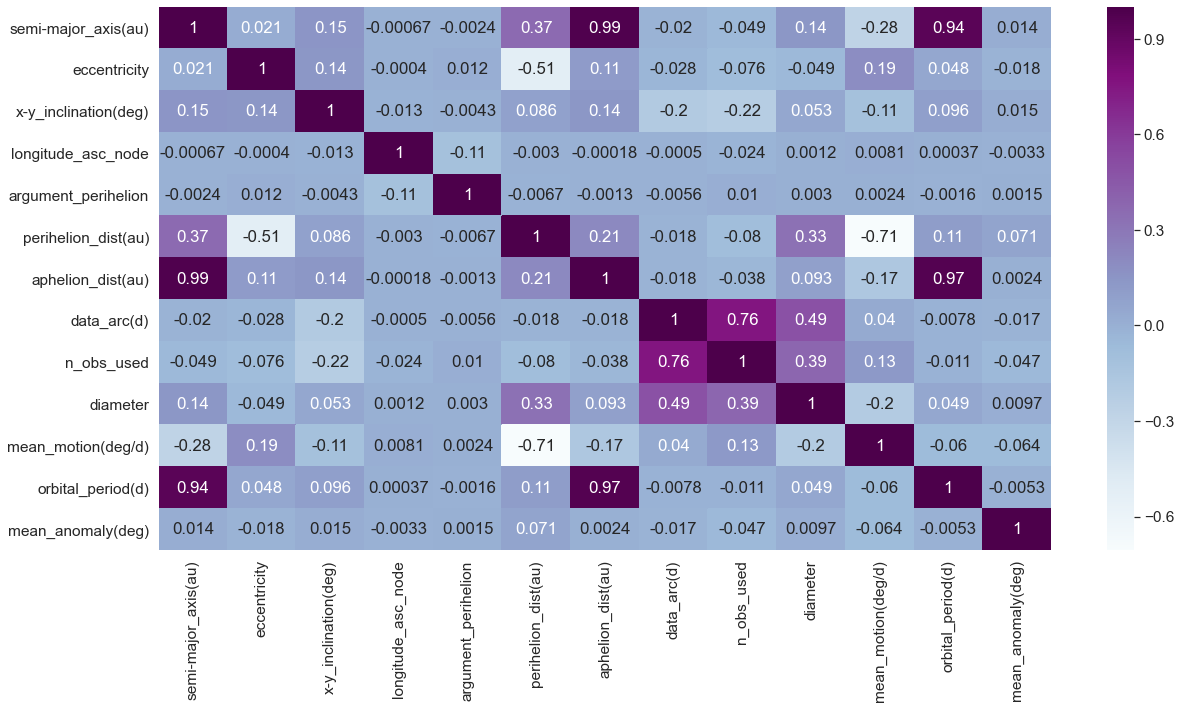

In [176]:
#Cleaning-up the heatmap.
sns.set(font_scale=1.4)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='BuPu');

#### 3.2.2 semi-major_axis(au)

In [177]:
df['semi-major_axis(au)'].describe()

count    137636.000000
mean          2.814613
std           1.522740
min           0.626226
25%           2.536714
50%           2.750859
75%           3.092537
max         389.145964
Name: semi-major_axis(au), dtype: float64

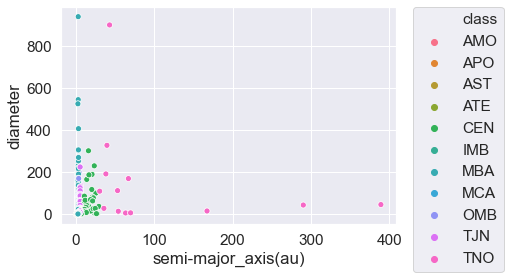

In [204]:
sns.scatterplot(x='semi-major_axis(au)', y='diameter', data=df, hue='class');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 3.2.3 Eccentricity

In [179]:
df['eccentricity'].describe()

count    137636.000000
mean          0.145485
std           0.077573
min           0.000489
25%           0.089623
50%           0.138543
75%           0.191141
max           0.984348
Name: eccentricity, dtype: float64

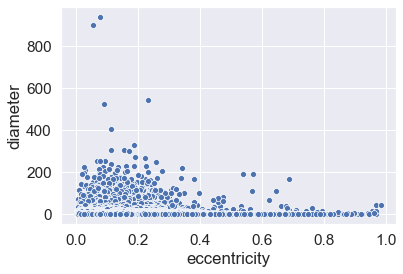

In [180]:
sns.scatterplot(x='eccentricity', y='diameter', data=df);

#### 3.2.4 Inclination

In [181]:
df['x-y_inclination(deg)'].describe()

count    137636.000000
mean         10.349182
std           6.835111
min           0.021855
25%           5.120506
50%           9.389963
75%          13.738588
max         170.323647
Name: x-y_inclination(deg), dtype: float64

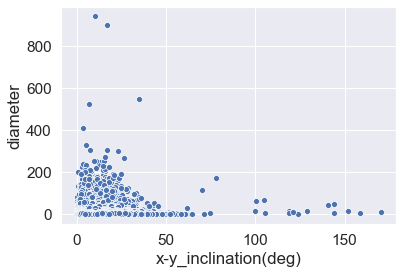

In [182]:
sns.scatterplot(x='x-y_inclination(deg)', y='diameter', data=df);

#### 3.2.5 Longitude

In [183]:
df['longitude_asc_node'].describe()

count    137636.000000
mean        169.827629
std         102.713052
min           0.000738
25%          82.334880
50%         160.438430
75%         256.268387
max         359.990858
Name: longitude_asc_node, dtype: float64

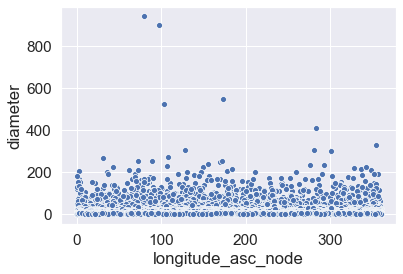

In [184]:
sns.scatterplot(x='longitude_asc_node', y='diameter', data=df);

#### 3.2.6 Argument Perihelion

In [185]:
df['argument_perihelion'].describe()

count    137636.000000
mean        181.904551
std         103.556464
min           0.004466
25%          91.947943
50%         183.669900
75%         271.762261
max         359.995174
Name: argument_perihelion, dtype: float64

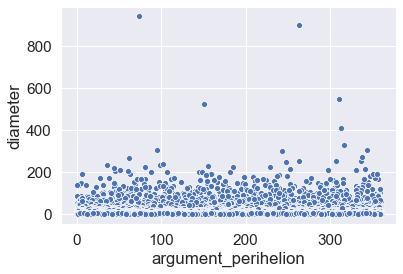

In [186]:
sns.scatterplot(x='argument_perihelion', y='diameter', data=df);

#### 3.2.7 Perihelion Distance

In [187]:
df['perihelion_dist(au)'].describe()

count    137636.000000
mean          2.402609
std           0.516169
min           0.081882
25%           2.068948
50%           2.363897
75%           2.685811
max          40.465671
Name: perihelion_dist(au), dtype: float64

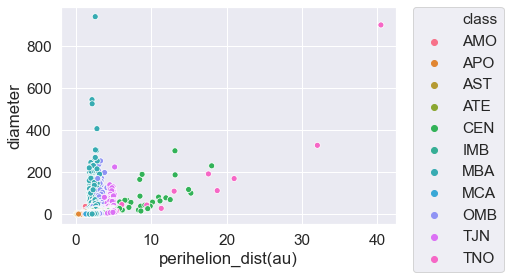

In [205]:
sns.scatterplot(x='perihelion_dist(au)', y='diameter', data=df, hue='class');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 3.2.8 Aphelion Distance

In [189]:
df['aphelion_dist(au)'].describe()

count    137636.000000
mean          3.226618
std           2.896374
min           0.999956
25%           2.864438
50%           3.167516
75%           3.468608
max         772.201080
Name: aphelion_dist(au), dtype: float64

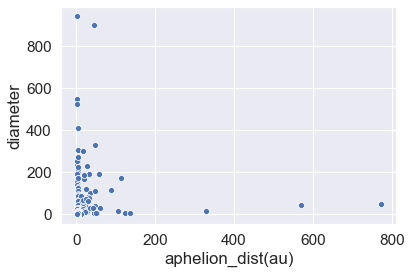

In [190]:
sns.scatterplot(x='aphelion_dist(au)', y='diameter', data=df);

#### 3.2.9 Data Arc

In [191]:
df['data_arc(d)'].describe()

count    137498.000000
mean       8969.818601
std        6165.176190
min           1.000000
25%        6291.000000
50%        7572.000000
75%        9731.000000
max       72684.000000
Name: data_arc(d), dtype: float64

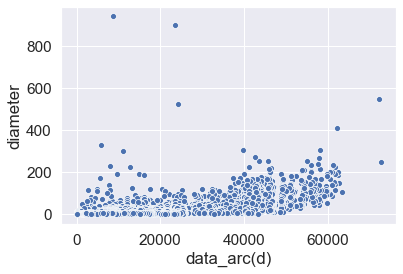

In [192]:
sns.scatterplot(x='data_arc(d)', y='diameter', data=df);

#### 3.2.10 Number of Observations Used

In [193]:
df['n_obs_used'].describe()

count    137636.000000
mean        675.027740
std         595.935104
min           5.000000
25%         215.000000
50%         496.000000
75%         984.000000
max        9325.000000
Name: n_obs_used, dtype: float64

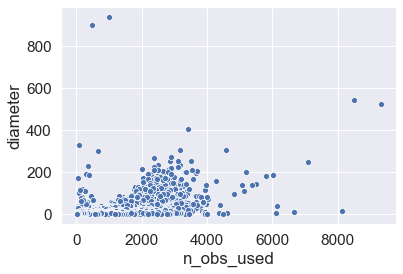

In [194]:
sns.scatterplot(x='n_obs_used', y='diameter', data=df);

#### 3.2.11 Mean Motion

In [195]:
df['mean_motion(deg/d)'].describe()

count    137636.000000
mean          0.219640
std           0.056980
min           0.000128
25%           0.181231
50%           0.216024
75%           0.243948
max           1.988877
Name: mean_motion(deg/d), dtype: float64

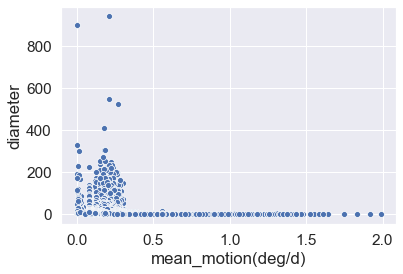

In [196]:
sns.scatterplot(x='mean_motion(deg/d)', y='diameter', data=df);

#### 3.2.12 Orbital Period

In [197]:
df['orbital_period(d)'].describe()

count    1.376360e+05
mean     1.783972e+03
std      9.325769e+03
min      1.810067e+02
25%      1.475726e+03
50%      1.666483e+03
75%      1.986419e+03
max      2.803930e+06
Name: orbital_period(d), dtype: float64

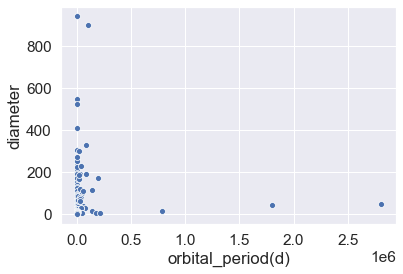

In [198]:
sns.scatterplot(x='orbital_period(d)', y='diameter', data=df);

#### 3.2.13 Mean Anomoly

In [199]:
df['mean_anomaly(deg)'].describe()

count    137636.000000
mean        183.116785
std         103.411497
min           0.000517
25%          94.301261
50%         186.826667
75%         271.468299
max         359.999979
Name: mean_anomaly(deg), dtype: float64

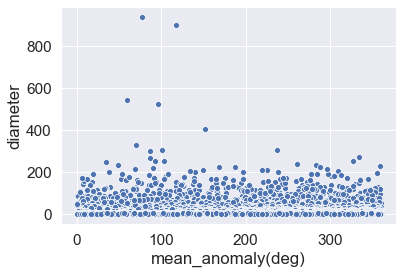

In [200]:
sns.scatterplot(x='mean_anomaly(deg)', y='diameter', data=df);

C:\Users\eboci_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\eboci_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\eboci_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\eboci_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\eboci_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in grea

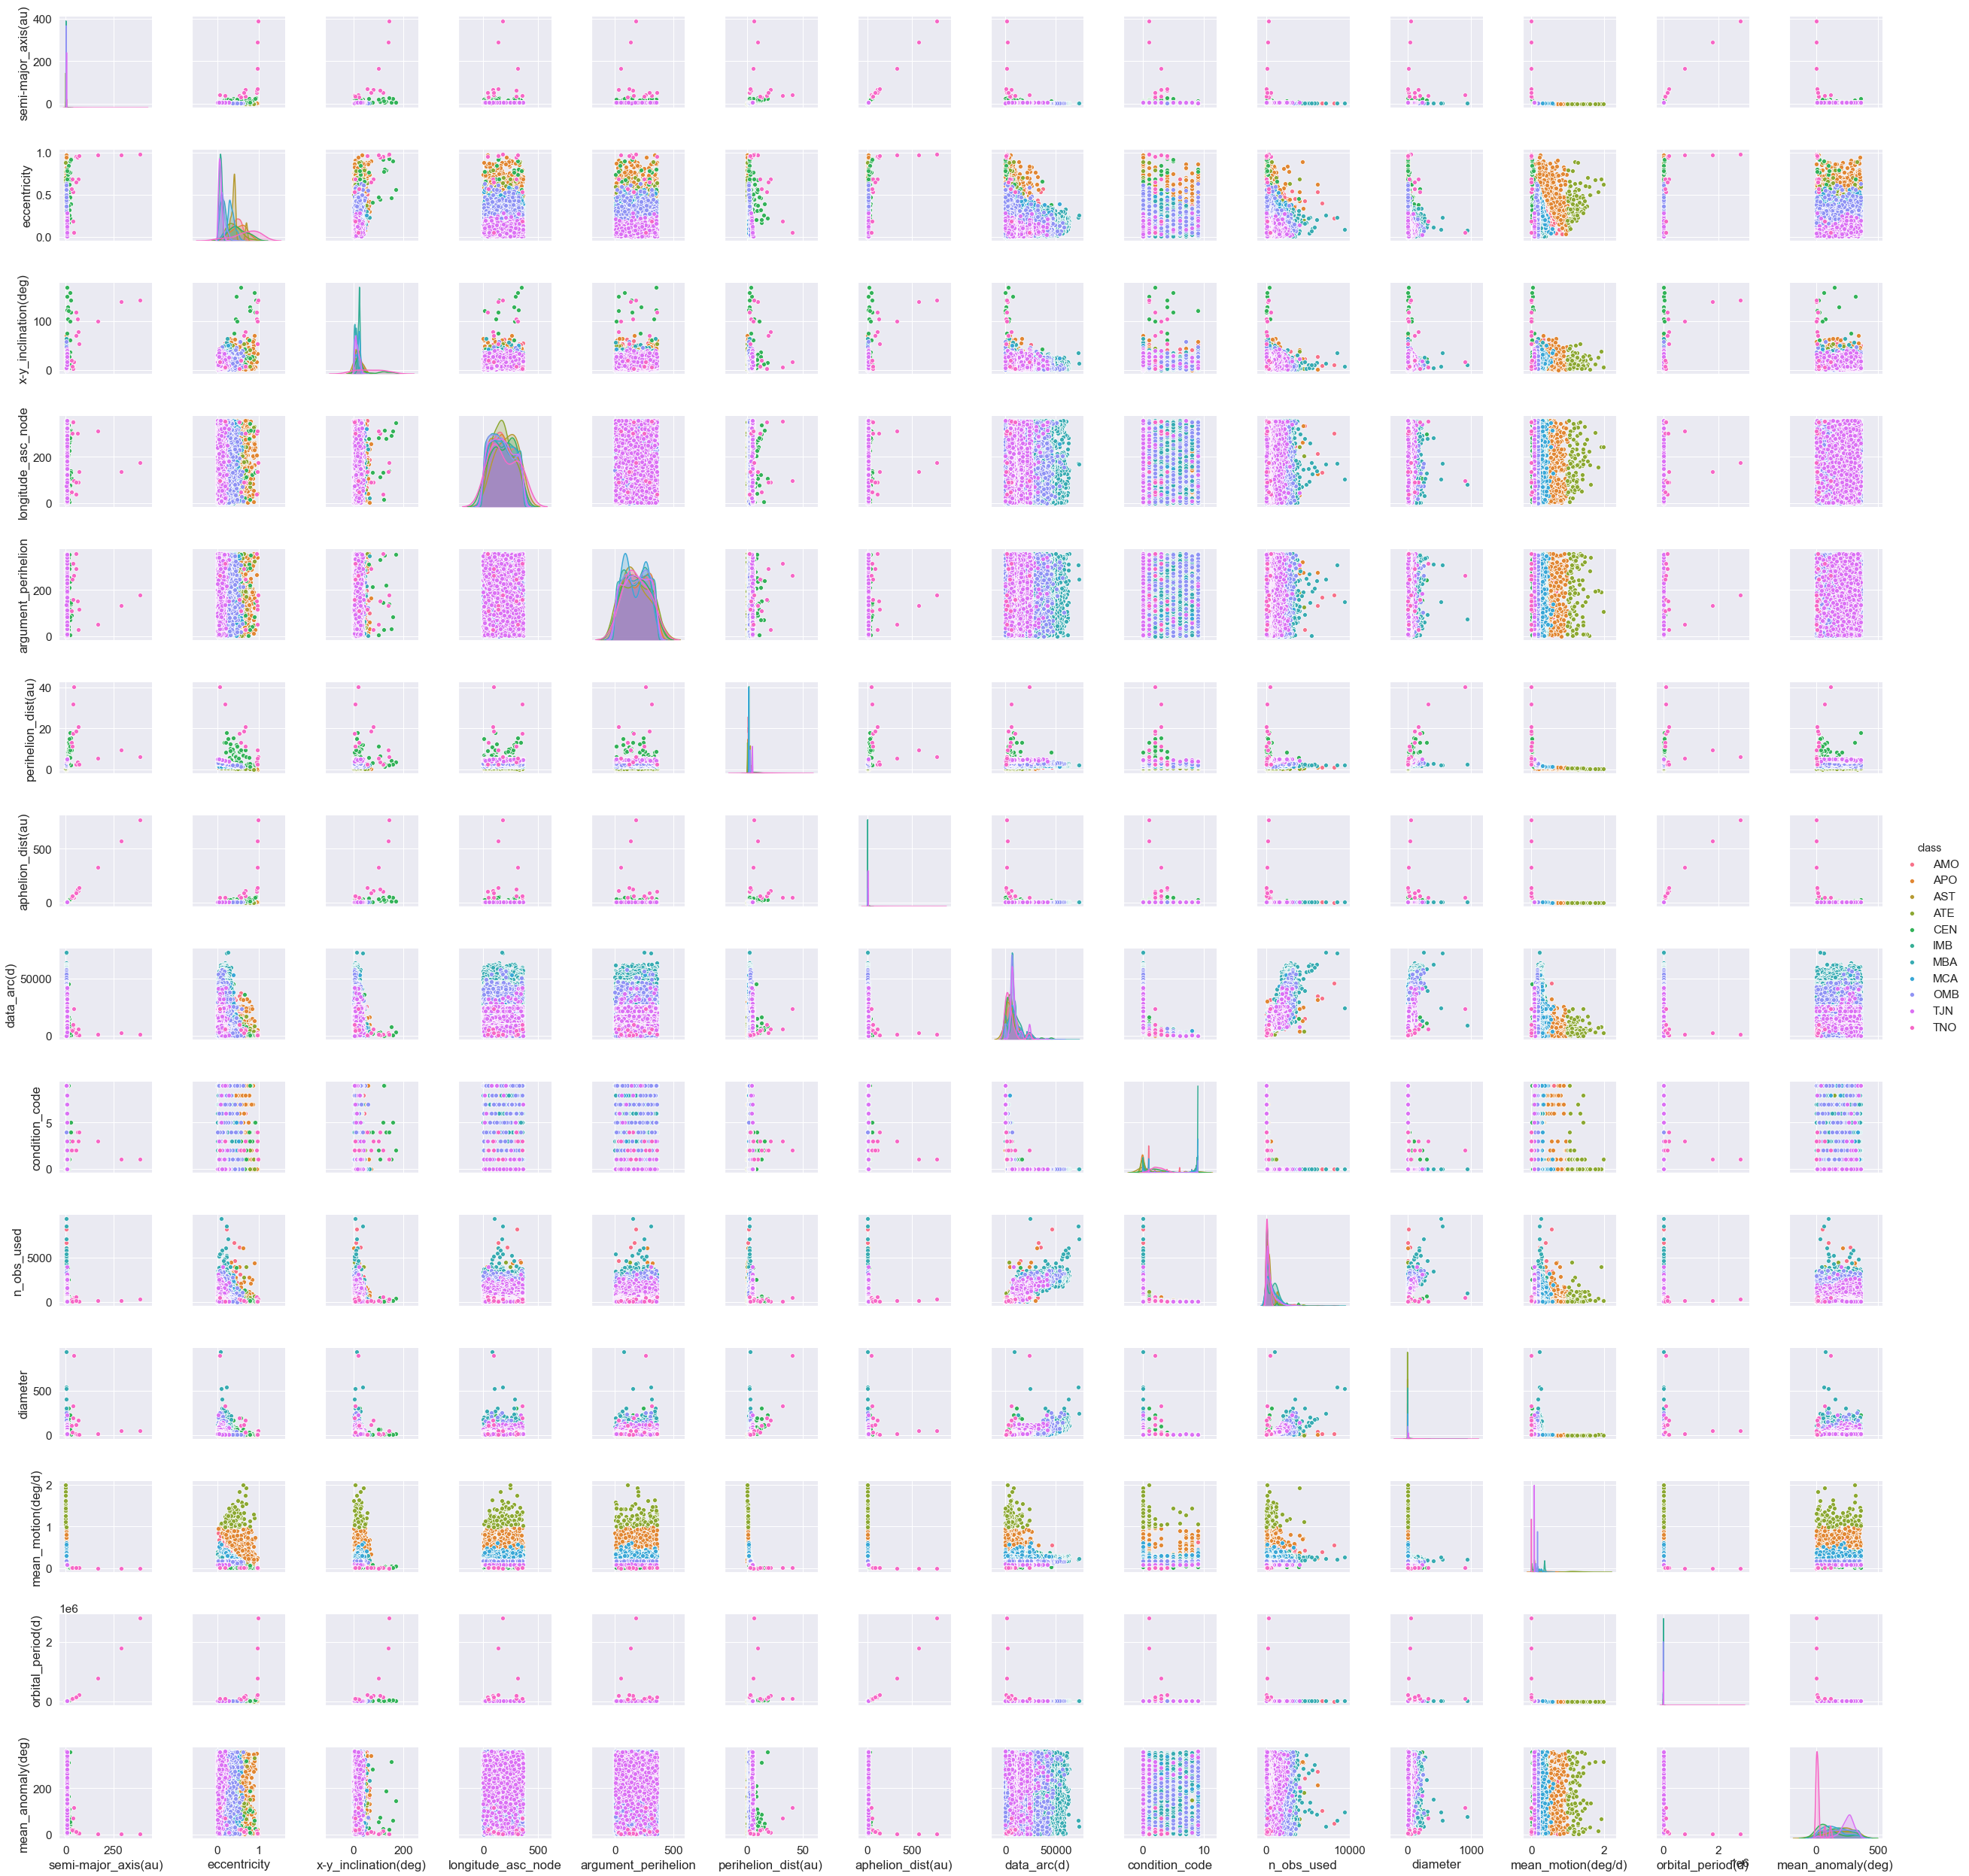

In [136]:
#Just saw an example and wanted to see. There look like some interesting relationships, but haven't explored them yet.
sns.pairplot(df, hue='class');